# Analyzing Police Activity in Rhode Island with pandas

In [1]:
import pandas as pd
ri = pd.read_csv('police.csv')
ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Preparing the data for analysis
### Completeness

In [2]:
ri.isna().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [3]:
ri.shape

(91741, 15)

In [4]:
ri.state.value_counts()

RI    91741
Name: state, dtype: int64

In [5]:
# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)
ri.shape

(91741, 13)

In [6]:
ri.isna().sum()

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [7]:
ri.dropna(subset=['driver_gender'], inplace=True)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


In [8]:
ri.shape

(86536, 13)

### Proper data types

In [9]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

> is_arrested column should have a boolean data type.

In [10]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [11]:
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


> Let's concatenate stop_date and stop_time columns and set it as the index

In [12]:
# Concatenate 'stop_date' and 'stop_time'
combined = ri.stop_date.str.cat(ri.stop_time, sep=" ")
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [13]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [14]:
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [15]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

## Exploring the relationship between gender and policing

In [16]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [17]:
ri.driver_race.value_counts(normalize=True)

White       0.714963
Black       0.141964
Hispanic    0.112404
Asian       0.027607
Other       0.003062
Name: driver_race, dtype: float64

#### Comparing violations by gender

In [18]:
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [19]:
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [20]:
# Female drivers
female = ri[ri['driver_gender']=='F']

# Male drivers
male = ri[ri['driver_gender']=='M']

female.violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [21]:
male.violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

> About 66% of female traffic stops are for speeding. This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.

## Does gender affect who gets a ticket for speeding?

In [22]:
# Female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [23]:
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [24]:
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

> About 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

## Does gender affect whose vehicle is searched?

In [25]:
ri.search_conducted.value_counts(normalize=True)

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

In [26]:
ri.search_conducted.mean()

0.0382153092354627

In [27]:
# Calculate the search rate for both groups simultaneously
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [28]:
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [29]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

> For all types of violations, the search rate is higher for males than for females.

## Does gender affect who is search for inventory?

In [30]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [31]:
ri.search_type.value_counts(dropna=False) # In order to see missing values

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

In [32]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)

In [33]:
ri.inventory.sum()

441

In [34]:
searched = ri[ri.search_conducted == True]

In [35]:
searched.inventory.mean()

0.13335349259147264

In [36]:
searched.groupby('driver_gender').inventory.mean()

driver_gender
F    0.175439
M    0.126622
Name: inventory, dtype: float64

## Does gender affect who is frisked during a search?

In [37]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [38]:
ri.frisk.dtype

dtype('bool')

In [39]:
ri.frisk.sum()

303

In [40]:
searched = ri[ri.search_conducted == True]

In [41]:
searched.frisk.mean()

0.09162382824312065

In [42]:
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

## Visual exploratory data analysis

In [43]:
import matplotlib.pyplot as plt

## Does time of day affect arrest rate?

In [44]:
ri.is_arrested.mean()

0.0355690117407784

In [45]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate.head()

stop_datetime
0    0.051431
1    0.064932
2    0.060798
3    0.060549
4    0.048000
Name: is_arrested, dtype: float64

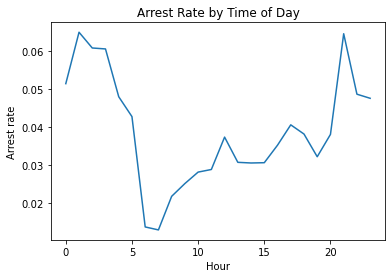

In [46]:
hourly_arrest_rate.plot()
plt.xlabel('Hour')
plt.ylabel('Arrest rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

## Are drug-related stops on the rise?

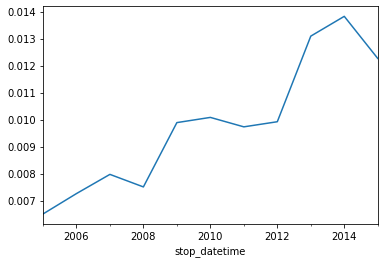

In [47]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('Y').mean()
annual_drug_rate.plot()
plt.show()

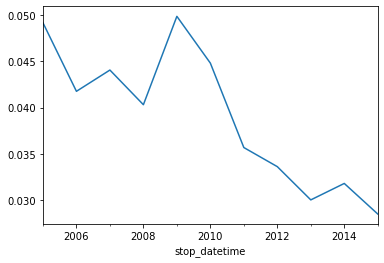

In [48]:
annual_search_rate = ri.search_conducted.resample('Y').mean()
annual_search_rate.plot()
plt.show()

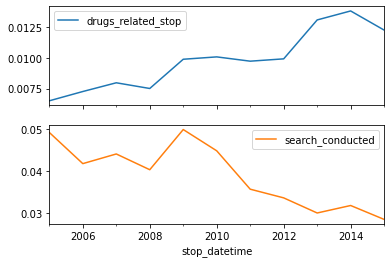

In [49]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)
plt.show()

## Race and gender ratio

In [50]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [51]:
table.loc['Asian':'Hispanic']

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


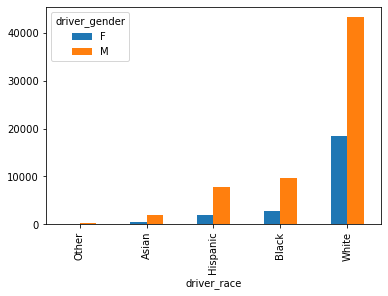

In [52]:
table.sort_values(by=['M', 'F']).plot(kind='bar')
plt.show()

## What violations are caught in each district?

In [53]:
all_zones = pd.crosstab(ri.district, ri.violation)
all_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


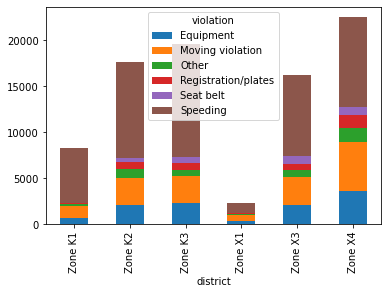

<Figure size 576x1080 with 0 Axes>

In [54]:
all_zones.plot(kind='bar', stacked=True)
plt.figure(figsize=(8,15))
plt.show()

In [55]:
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [56]:
x_zones = all_zones.loc['Zone X1':'Zone X4']
x_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


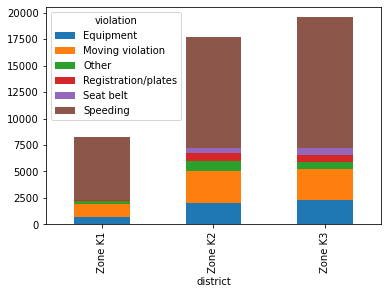

In [57]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)
plt.show()

> The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations.

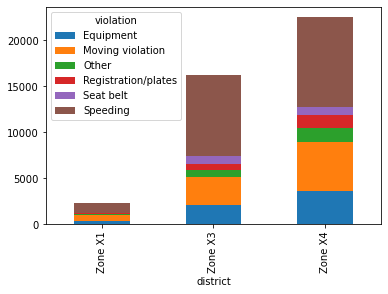

In [58]:
x_zones.plot(kind='bar', stacked=True)
plt.show()

> It is the same case for x zones

## How long might you be stopped for a violation?

In [59]:
ri.stop_duration.value_counts()

0-15 Min     69577
16-30 Min    13740
30+ Min       3219
Name: stop_duration, dtype: int64

In [60]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [61]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23,'30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)
ri.stop_minutes.unique()

array([ 8, 23, 45])

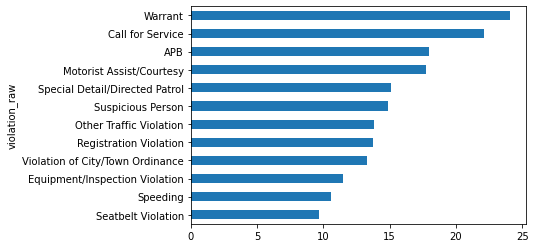

In [62]:
stop_length = ri.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh')
plt.show()

## Analyzing the effect of weather on policing

In [63]:
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [64]:
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [65]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


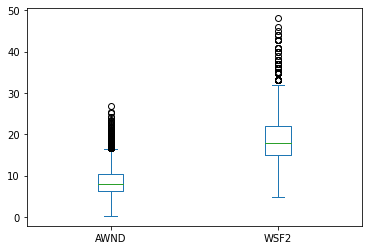

In [66]:
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

In [67]:
weather['WDIFF'] = weather.WSF2 - weather.AWND

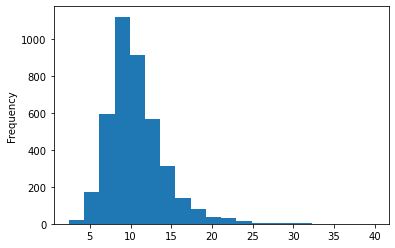

In [68]:
weather['WDIFF'].plot(kind='hist', bins=20)
plt.show()

> It have a normal shape that means that the dataset is trustworthy.

#### Temperature difference

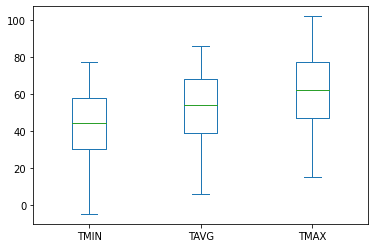

In [69]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

> The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

In [70]:
weather['TDIFF'] = weather.TMAX - weather.TMIN
weather['TDIFF'].describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

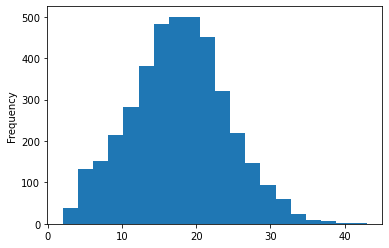

In [71]:
weather['TDIFF'].plot(kind='hist', bins=20)
plt.show()

> The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

In [72]:
weather.shape

(4017, 29)

In [73]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'WDIFF', 'TDIFF'],
      dtype='object')

In [74]:
temp = weather.loc[:, 'TAVG':'TMAX']
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [75]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [76]:
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

In [77]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [78]:
mapping = {'0-15 Min':'short', '16-30 Min':'medium','30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)
ri['stop_length'].dtype

dtype('O')

In [79]:
ri['stop_length'].unique()

array(['short', 'medium', 'long'], dtype=object)

In [80]:
cats = pd.CategoricalDtype(['short', 'medium', 'long'], ordered=True)
ri['stop_length'] = ri['stop_length'].astype(cats)
ri['stop_length'].head()

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

### Categorizing the weather


#### Counting bad weather conditions

In [81]:
WT = weather.loc[:,'WT01':'WT22']
weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

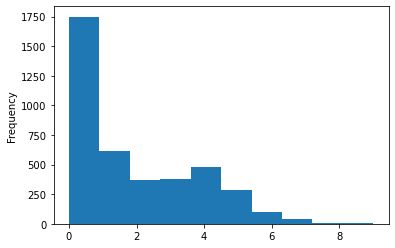

In [82]:
weather['bad_conditions'].plot(kind='hist')
plt.show()

> It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

#### Rating the weather conditions

In [83]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [84]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [85]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)
weather.rating.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']

### Merging datasets

In [86]:
ri.reset_index(inplace=True)
ri.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes,stop_length
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8,short
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23,medium
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8,short


In [87]:
weather_rating = weather[['DATE','rating']]
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [88]:
ri.shape

(86536, 18)

In [89]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
ri_weather.shape

(86536, 20)

In [90]:
ri_weather.set_index('stop_datetime', inplace=True)

In [91]:
ri_weather.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,inventory,frisk,stop_minutes,stop_length,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,False,8,short,2005-01-23,worse
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,False,8,short,2005-02-17,good
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,False,23,medium,2005-02-20,bad
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,False,8,short,2005-02-24,bad


## Does weather affect the arrest rate?

In [92]:
ri.search_conducted.mean()

0.0382153092354627

In [93]:
search_rate = ri.groupby(['violation','driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [94]:
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [95]:
search_rate.loc['Equipment', 'M']

0.07149643705463182

In [96]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [97]:
ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


#### Comparing arrest rates by weather rating

In [98]:
ri_weather.is_arrested.mean()

0.0355690117407784

In [99]:
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [100]:
ri_weather.groupby(['violation','rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

> The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's interesting.

#### Selecting from a multi-indexed Series

In [101]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
type(arrest_rate)

pandas.core.series.Series

In [102]:
# Print the arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation', 'bad']

0.05804964058049641

In [103]:
arrest_rate.loc['Speeding']

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64

> When the weather is worse the arrest rate is 1.69%.

#### Reshaping the arrest rate data

In [104]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [105]:
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


> The most frequent violation category is Registration/plates in a worse weather condition with 11.5% rate.